In [33]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import shap
import time
import pytorch_grad_cam
import cv2

from WallWorld import WallWorld
from DqnAgent import DqnAgent
from DqnAgentNewDims import DqnAgentNewDims

if __name__ == "__main__":

    # Config
    max_steps=500_000

    # WallWorld
    render_mode=None
    size=7
    agentSpawn = None
    maxSteps=200
    stepLoss=0
    chestSpawnCoordinates=np.array([[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6],
                                    [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6],
                                    [2, 0], [2, 1], [2, 2],         [2, 4], [2, 5], [2, 6]])
    wallCoordinates=      np.array([[3, 0], [3, 1], [3, 2],         [3, 4], [3, 5], [3, 6],])
    agentSpawnCoordinates=np.array([[4, 0],                                         [4, 6],
                                    [5, 0],                                         [5, 6],
                                    [6, 0],                                         [6, 6]])
    randomWalls=0
    redChestCoordinates=None
    greenChestCoordinates=None
    keyCoordinates=None
    randomredChests=1
    randomgreenChests=1
    randomkeys=0
    redChestReward=-1 # Don't change this
    greenChestReward=1 # Don't change this
    # Explaination:
    # terminated with 1 reward ---> green chest: 1
    # terminated with 0 reward ---> red chest:  -1
    # truncated                 --> no chest:    0
    
    # Agent
    batch_size=64
    lr=0.001
    gamma=0.95
    epsilon_start=1
    epsilon_min=0.05
    epsilon_decay=200_000 # 50_000 at 3000 episodes
    tau=0.0005 # Was 0.005
    replayBuffer=100_000

    env = WallWorld(render_mode=None,
                    size=size, agentSpawn=agentSpawn,
                    stepLoss=stepLoss, maxSteps=maxSteps,
                    wallCoordinates=wallCoordinates,
                    randomWalls=randomWalls,
                    redChestCoordinates=redChestCoordinates,
                    greenChestCoordinates=greenChestCoordinates,
                    keyCoordinates=keyCoordinates,
                    redChestReward=redChestReward,
                    greenChestReward=greenChestReward,
                    randomredChests=randomredChests,
                    randomgreenChests=randomgreenChests,
                    randomkeys=randomkeys,
                    agentSpawnCoordinates=agentSpawnCoordinates,
                    chestSpawnCoordinates=chestSpawnCoordinates,
                    newDims=True)
    observation, _ = env.reset()
    agent = DqnAgentNewDims(env.action_space, observation,
        batch_size=batch_size,
        lr=lr,
        gamma=gamma,
        epsilon_start=epsilon_start,
        epsilon_min=epsilon_min,
        epsilon_decay=epsilon_decay,
        tau=tau,
        replayBuffer=replayBuffer)
    
    maxSteps = 30 #????
    show_env = WallWorld(render_mode="human",
                    size=size, agentSpawn=agentSpawn,
                    stepLoss=stepLoss, maxSteps=maxSteps,
                    wallCoordinates=wallCoordinates,
                    randomWalls=randomWalls,
                    redChestCoordinates=redChestCoordinates,
                    greenChestCoordinates=greenChestCoordinates,
                    keyCoordinates=keyCoordinates,
                    redChestReward=redChestReward,
                    greenChestReward=greenChestReward,
                    randomredChests=randomredChests,
                    randomgreenChests=randomgreenChests,
                    randomkeys=randomkeys,
                    agentSpawnCoordinates=agentSpawnCoordinates,
                    chestSpawnCoordinates=chestSpawnCoordinates,
                    newDims=True)

    modelNames = ["r00_g10_1500k",
              "r01_g10_1500k",
              "r02_g10_1500k",
              "r03_g10_1500k",
              "r04_g10_1500k",
              "r05_g10_1500k",
              "r06_g10_1500k",
              "r07_g10_1500k",
              "r08_g10_1500k",
              "r09_g10_1500k",
              "r10_g00_1500k",
              "r10_g01_1500k",
              "r10_g02_1500k",
              "r10_g03_1500k",
              "r10_g04_1500k",
              "r10_g05_1500k",
              "r10_g06_1500k",
              "r10_g07_1500k",
              "r10_g08_1500k",
              "r10_g09_1500k",
              "r10_g10_1500k"]

Model loaded: C:/Projects/public/XAI_Master/models/r10_g01_3000k.pth
Right: 0.593, Down: 0.637, Left: 0.667, Up: 0.669, 

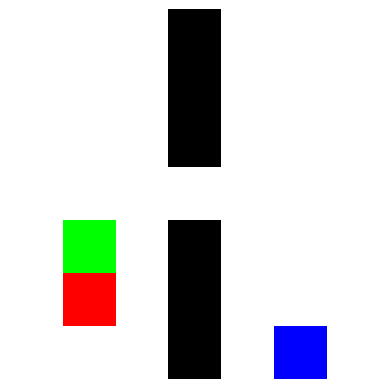

In [34]:
#agent.load_model_weights(f"C:/Projects/public/XAI_Master/models/r10_g10_1500k.pth")
#agent.load_model_weights(f"C:/Projects/public/XAI_Master/models/newDimsModel_3000k.pth")
agent.load_model_weights(f"C:/Projects/public/XAI_Master/models/r10_g01_3000k.pth")


state, _ = env.reset()
state = torch.tensor(state, dtype=torch.float32, device=agent.device).unsqueeze(0)
actions = agent.predict(state)

def plotState(state):
    image = state.squeeze().numpy().transpose((2, 1, 0))
    plt.imshow(image, interpolation='nearest')
    plt.axis('off')
    plt.show()

def printActions(actions):
    action_to_direction = {0: 'Right', 1: 'Down', 2: 'Left', 3: 'Up'}
    for i, action in enumerate(actions[0]):
        print(f"{action_to_direction[i]}: {action:.3f}", end=", ")

printActions(actions)
plotState(state)


agent.policy_net.conv3: Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
actions: tensor([[0.5926, 0.6365, 0.6671, 0.6686]])
state.shape: torch.Size([1, 3, 7, 7])
state.shape: torch.Size([1, 3, 7, 7])


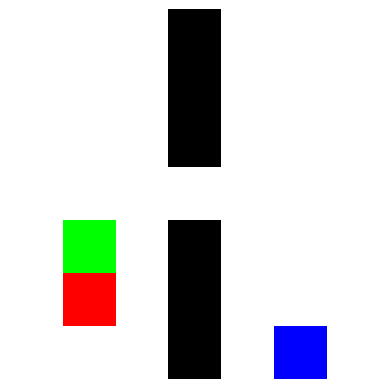

grayscale_cam.shape: (1, 7, 7)
original_img.shape: (7, 7, 3)
grayscale_cam.shape: (7, 7)


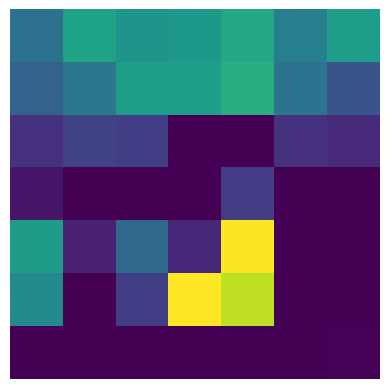

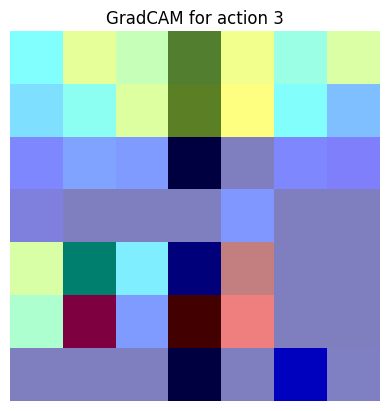

Model outputs: tensor([[0.6363, 0.6582, 0.7108, 0.6870]], grad_fn=<AddmmBackward0>)


In [35]:
# implement pytorch_grad_cam using this layer
print(f"agent.policy_net.conv3: {agent.policy_net.conv3}")
print(f"actions: {actions}")
print(f"state.shape: {state.shape}")

target_layer = agent.policy_net.conv3


# tutorial
"""
model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]
input_tensor = # Create an input tensor image for your model..
# Note: input_tensor can be a batch tensor with several images!

# We have to specify the target we want to generate the CAM for.
targets = [ClassifierOutputTarget(281)]

# Construct the CAM object once, and then re-use it on many images.
with GradCAM(model=model, target_layers=target_layers) as cam:
  # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
  grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
  # In this example grayscale_cam has only one image in the batch:
  grayscale_cam = grayscale_cam[0, :]
  visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
  # You can also get the model outputs without having to redo inference
  model_outputs = cam.outputs


"""
import torch
import numpy as np
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# Assuming you have the agent, state and actions defined as shown in your output

# First, we need to ensure the state is in the right format
# Your state shape is [1, 7, 7, 3] (batch, height, width, channels)
# But PyTorch typically expects [batch, channels, height, width]
#state_tensor = state.permute(0, 1, 3, 2)  # Rearrange to [1, 3, 7, 7]
state_tensor = state.permute(0, 1, 3, 2)

print(f"state.shape: {state_tensor.shape}")

# Define a target class for GradCAM
# In RL, we're typically interested in the action that was chosen
# Let's assume we want to visualize the gradients for the action with highest probability
action_idx = torch.argmax(actions, dim=1).item()
targets = [ClassifierOutputTarget(action_idx)]

plotState(state)

# Create a GradCAM object with the agent's policy network and target layer
with GradCAM(model=agent.policy_net, target_layers=[target_layer]) as cam:
    # Generate the CAM
    grayscale_cam = cam(input_tensor=state_tensor, targets=targets)
    
    print(f"grayscale_cam.shape: {grayscale_cam.shape}")
    # Since we have only one image in the batch
    grayscale_cam = grayscale_cam[0, :]
    
    # Convert the state to a numpy array for visualization
    # First, convert it back to the format [height, width, channels]
    original_img = state_tensor[0].permute(1, 2, 0).cpu().numpy()
    
    # Normalize the image for visualization if it's not already in [0, 1] range
    if original_img.max() > 1.0:
        original_img = original_img / 255.0

    print(f"original_img.shape: {original_img.shape}")
    print(f"grayscale_cam.shape: {grayscale_cam.shape}")
    #plt.imshow(original_img, interpolation='nearest')
    plt.imshow(grayscale_cam, interpolation='nearest')
    plt.axis('off')
    plt.show()
    
    # Create the CAM visualization
    visualization = show_cam_on_image(original_img, grayscale_cam, use_rgb=True)
    
    # Save or display the visualization
    import matplotlib.pyplot as plt
    plt.imshow(visualization)
    plt.title(f"GradCAM for action {action_idx}")
    plt.axis('off')
    plt.show()
    
    # You can also get the model outputs without redoing inference
    model_outputs = cam.outputs
    print(f"Model outputs: {model_outputs}")